# Cogs 189 - BCI Project

In this project we are simulating an offline approach with cross-validation to test different classification models such as KNN, SVM, Multi-Layer Perceptron. We will examine the results with the aim of fine-tuning the algorithms hyper parameters to acheive better accuracies. Which can help lead to better online preformance. Each person has variable brain activity so finetuning the callsifers can lead to better preformance. A known issue with using classifiers is the curse of dimensionality and the bias-variance tradeoff. We will address these issues as they appear. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

### Importing data

In [315]:
df = pd.read_csv("data.csv", header = None)

In [316]:
df.shape

(360500, 22)

### Fixing imbalanced classes

In [324]:
df.T.loc[21].value_counts()

1.0    154500
5.0     50500
3.0     50000
2.0     50000
4.0     49500
0.0      6000
Name: 21, dtype: int64

In [333]:
df_0 = df[df.T.loc[21] == 0]

In [334]:
df_0_upsample = resample(df_0, replace=True,     # sample with replacement
                n_samples=50000,    # to match majority class
                random_state=123) # reproducible results

In [335]:
df_0_upsample.T.loc[21].value_counts()

0.0    50000
Name: 21, dtype: int64

In [336]:
df_1 = df[df.T.loc[21] == 1]

In [337]:
df_1_downsample = resample(df_1, replace=True,     # sample with replacement
                n_samples=50000,    # to match majority class
                random_state=123) # reproducible results

In [338]:
df_1_downsample.T.loc[21].value_counts()

1.0    50000
Name: 21, dtype: int64

In [339]:
df_4 = df[df.T.loc[21] == 4]

In [340]:
df_4_upsample = resample(df_4, replace=True,     # sample with replacement
                n_samples=50000,    # to match majority class
                random_state=123) # reproducible results

In [342]:
df_5 = df[df.T.loc[21] == 5]

In [343]:
df_5_downsample = resample(df_5, replace=True,     # sample with replacement
                n_samples=50000,    # to match majority class
                random_state=123) # reproducible results

In [344]:
df_5_downsample.T.loc[21].value_counts()

5.0    50000
Name: 21, dtype: int64

In [371]:
df_3 = df[df.T.loc[21] == 3]
df_2 = df[df.T.loc[21] == 2]

In [372]:
df = pd.concat([df_0_upsample, df_1_downsample, df_2, df_3, df_4_upsample, df_5_downsample])

In [375]:
df.T.loc[21].value_counts()

1.0    50000
3.0    50000
5.0    50000
4.0    50000
2.0    50000
0.0    50000
Name: 21, dtype: int64

### Standardizing the features 

In [376]:
scaler = StandardScaler()

In [377]:
scaler.fit(df.loc[:, '0':'20'])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [378]:
df.loc[:, '0':'20'] = scaler.transform(df.loc[:, '0':'20'])

### Spliting features and labels

In [379]:
labels = df.T.loc[21]

In [380]:
features = df.loc[:, '0':'20']

In [381]:
#labels = labels[: 1000,]
labels.shape

(300000,)

In [382]:
#features = features[: 1000]
features.shape

(300000, 21)

### Train/Test split

In [383]:
features_train, features_test, target_train, target_test = train_test_split(
    features, labels, test_size=0.5, random_state=1)

### KNN Classifer with k = 3

In [384]:
#knn = KNeighborsClassifier(n_neighbors=5)

#### K-folds Cross Validation with 10 folds

In [385]:
#cross_val_score(knn, features_train, target_train, scoring='accuracy', cv=10).mean()

0.9295932967857544

### Confusion Matrix - Visualizing a KNN’s Performance without paramter tuning

In [386]:
target_predicted = knn.fit(features_train, target_train).predict(features_test)

In [387]:
matrix = confusion_matrix(target_test, target_predicted)

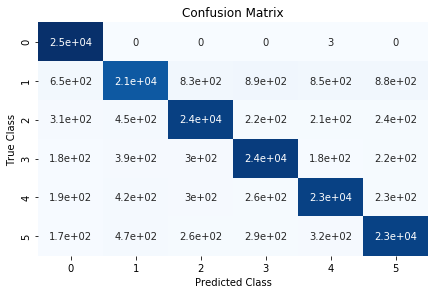

In [388]:
class_names = ['0','1','2','3','4','5']

dataframe = pd.DataFrame(matrix, index=class_names, columns =class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class") 
plt.xlabel("Predicted Class")
plt.show()

### KNN Classifer with n_neighbors parameter tuning 

In [300]:
knn = KNeighborsClassifier()

In [301]:
hyperparameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [302]:
gridsearch = GridSearchCV(knn, hyperparameters, cv=10, verbose=0, return_train_score=True)

In [303]:
best_model = gridsearch.fit(features_train, target_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [304]:
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 3


#### Now we know the best n_neighbors we can use it. 

In [305]:
knn = KNeighborsClassifier(n_neighbors= best_model.best_estimator_.get_params()['n_neighbors'])
knn = knn.fit(features_train, target_train)
print('Test Accuracy : ' + str(knn.score(features_test,target_test)))

Test Accuracy : 0.97875


In [306]:
target_predicted = knn.fit(features_train, target_train).predict(features_test)

In [307]:
matrix = confusion_matrix(target_test, target_predicted)

### Confusion Matrix - Visualizing a KNN’s Performance with best parameters

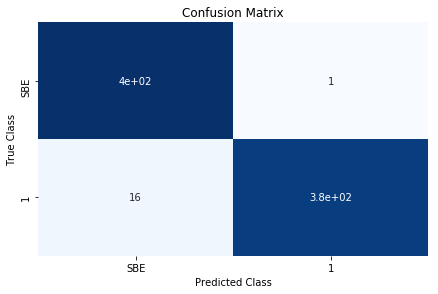

In [309]:
dataframe = pd.DataFrame(matrix, index=class_names, columns =class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class") 
plt.xlabel("Predicted Class")
plt.show()

### SVM

In [399]:
svm_model = svm.SVC()

In [400]:
C_list = [10**-5,10**-4,10**-3,10**-2,10**-1]
hyperparameters = {'C':C_list}

In [ ]:
gridsearch = GridSearchCV(svm_model, hyperparameters, cv=10, verbose=0, return_train_score=True)
best_model = gridsearch.fit(features_train, target_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
svm_model = svm.SVC(C = best_model.best_estimator_.get_params()['C'])

In [ ]:
svm_model = svm_model.fit(features_train, target_train)

In [ ]:
print('Test Accuracy : ' + str(svm_model.score(features_test,target_test)))

In [ ]:
target_predicted = svm_model.fit(features_train, target_train).predict(features_test)

In [ ]:
matrix = confusion_matrix(target_test, target_predicted)

In [ ]:
dataframe = pd.DataFrame(matrix, index=class_names, columns =class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class") 
plt.xlabel("Predicted Class")
plt.show()

### MLP

In [ ]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1, max_iter=100)

In [ ]:
hyperparameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)]}

In [ ]:
gridsearch = GridSearchCV(MLP, hyperparameters, cv=10, verbose=0, return_train_score=True)

In [ ]:
best_model = gridsearch.fit(features_train, target_train)

In [ ]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1, max_iter=100, hidden_layer_sizes = best_model.best_estimator_.get_params()['hidden_layer_sizes'])

In [ ]:
print('Test Accuracy : ' + str(MLP.score(features_test,target_test)))

In [ ]:
target_predicted = MLP.fit(features_train, target_train).predict(features_test)

In [ ]:
matrix = confusion_matrix(target_test, target_predicted)

In [ ]:
dataframe = pd.DataFrame(matrix, index=class_names, columns =class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class") 
plt.xlabel("Predicted Class")
plt.show()